# BOOK RECOMENDATION SYSTEM (collaborative filtering)

here,we will use the Collaborative based filtering method to build a book recommender system. You can download the dataset from [here](https://www.kaggle.com/arashnic/book-recommendation-dataset)

## 1) loading datasets

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Books.csv',low_memory=False)
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
userdf = pd.read_csv('Users.csv')
userdf.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## 2) EDA

In [6]:
usercount = ratings['User-ID'].value_counts()
usercount.head()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: User-ID, dtype: int64

## Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### count of different age groups

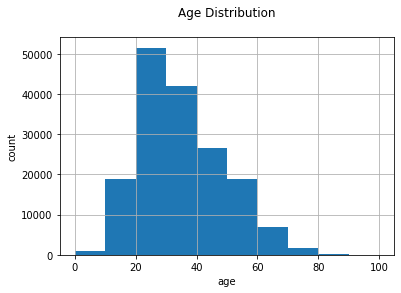

In [8]:
userdf.Age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()


#### count based on ratings

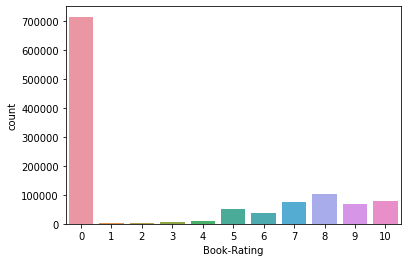

In [9]:
sns.countplot(data=ratings, x='Book-Rating')
plt.show()

#### To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [10]:
ratings = ratings[ratings['User-ID'].isin(usercount[usercount >= 200].index)]
0ratingcount = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(ratingcount[ratingcount >= 50].index)]

SyntaxError: invalid syntax (<ipython-input-10-d3ff6f62f17b>, line 2)

In [11]:
merged_df = ratings.merge(df, on='ISBN')
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [12]:
merged_df.columns


Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

#### Now in the books file, we remove extra columns which are not required for our task like image URLs.

In [13]:
df2 = merged_df.drop(['Image-URL-L','Image-URL-S','Image-URL-M','Book-Author',
       'Year-Of-Publication', 'Publisher'],axis=1)
df2.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


#### Drop null data from title column

In [14]:
newbook_df = df2.dropna(axis = 0, subset = ['Book-Title'])
newbook_df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [15]:
rating_count = (newbook_df.groupby(by=['Book-Title'])['Book-Rating'].count().reset_index())
rating_count.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [16]:
final = newbook_df.merge(rating_count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
final.head()


,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Rating_y
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [17]:
dataset=final.rename(columns={"Book-Rating_x":"BookRating","Book-Rating_y":"Total_rating"})
dataset.columns

Index(['User-ID', 'ISBN', 'BookRating', 'Book-Title', 'Total_rating'], dtype='object')

In [18]:
threshold  = 50
popularbook = dataset.query('Total_rating>=@threshold')
popularbook.head()

,User-ID,ISBN,BookRating,Book-Title,Total_rating
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


## Pivot Table

In [19]:
from scipy.sparse import csr_matrix
sparsedf = popularbook.drop_duplicates(['User-ID','Book-Title'])
pivot_matrix = sparsedf.pivot(index = 'Book-Title', columns = 'User-ID', values = 'BookRating').fillna(0)

In [20]:
pivot_matrix.head()

User-ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3) Modelling

But here in the pivot table, we have lots of zero values and on clustering, this computing power will increase to calculate the distance of zero values so we will convert the pivot table to the sparse matrix and then feed it to the model.

In [21]:
finalcsr = csr_matrix(pivot_matrix.values)
finalcsr

<2444x47994 sparse matrix of type '<class 'numpy.float64'>'
	with 113444 stored elements in Compressed Sparse Row format>

### Using KNN

In [22]:
from sklearn.neighbors import NearestNeighbors

#### Training:

### cosine similarity
Cosine similarity is the cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes).


In [23]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(finalcsr)

NearestNeighbors(algorithm='brute', metric='cosine')

### Testing:

let's test for the book at 200 index

In [24]:
pivot_matrix.index[200]

'Babyhood'

In [25]:
distances, suggestions = model.kneighbors(pivot_matrix.iloc[200, :].values.reshape(1, -1))
print(distances, suggestions)

[[0.         0.86652733 0.87902944 0.89410469 0.89502975]] [[ 200 2374   13 1978 2427]]


5 nearest neighbours for serched book

In [26]:
for i in range(len(suggestions)):
  print(pivot_matrix.index[suggestions[i]])

Index(['Babyhood', 'What to Expect the First Year',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'The Legend of Bagger Vance',
       'Wouldn't Take Nothing for My Journey Now'],
      dtype='object', name='Book-Title')
